Creating a Classification Model
==
**Authors**: Bao Dinh, Wesley Smith, Dakoda Fisher, Mohammed Qurneh, Andreas Cedron

**Research Question:** How do personal and occupational factors affect income?

**Dataset:** *Census Income* dataset extracted by Barry Becker in 1994 and donated to the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Census+Income)

**Problem Statement:** Using the *Census Income* dataset, we'll build a classification model to predict whether the income of a U.S. individual will be greater than or less than $50,000 per year.

# Importing Libararies
We'll begin by importing the necessary libraries for creating a classification model.

In [29]:
# libaries for data processing
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# modules for encoding variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# modules for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

# modules for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

# Loading Dataset
As mentioned before, we'll use the *Census Income* dataset from the link above. We'll start by loading the dataset from the UC Irvine Machine Learning Repository.

In [30]:
# install library to connect to the repository
!pip install ucimlrepo
# import libraries
from ucimlrepo import fetch_ucirepo

In [31]:
# fetch dataset
adult = fetch_ucirepo(id=2)
# store features and targets as pandas dataframes
X = adult.data.features
y = adult.data.targets
# print database metadata
print(adult.metadata)
# concatenate features and targets
data = pd.concat([X, y], axis=1)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Initial Data Exploration
It is a good idea to understand the overall structure of our data before we begin processing dataset.

In [32]:
df = data.copy()

# shape of dataset
print("Shape of dataframe is:", df.shape, "\n")
# summary of data
df.info()
# statistical details of data
df.describe().T

Shape of dataframe is: (48842, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [33]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


From the code output above, we can see our dataset has a total of **`15 variables`** and **`48842 observations`**. **`income`** is our target variable.

Our **6** numerical features are: **`age`**, **`fnlwgt`**, **`education-num`**, **`capital-gain`**, **`capital-loss`**, and **`hours-per-week`**

Our **9** categorical features are: **`workclass`**, **`education`**, **`marital-status`**, **`occupation`**, **`relationship`**, **`race`**, **`sex`**, and **`native-country`**

## Unique Values
We'll now investigate each columns' unique values.

In [34]:
for c in df.columns:
  print(c + ":", df[c].sort_values().unique(), "\n")

age: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90] 

workclass: ['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' nan] 

fnlwgt: [  12285   13492   13769 ... 1455435 1484705 1490400] 

education: ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] 

education-num: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 

marital-status: ['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] 

occupation: ['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-s

From the code output above, we can see various notable aspects of our dataset:

* **`workclass`**, **`occupation`**, and **`native-country`** are the only columns with **`null`** values
* **`workclass`**, **`occupation`**, and **`native-country`** are the only columns with missing values (which are represented by a **`?`** character
* all of our columns have more than one unique value which means all of our columns have variance
* **`income`** is neither binary nor numerical
* many of the columns are categorical

When we are data cleaning, we will have to take the following steps:
* replace the missing values with either **`null`** values or fill them with an appropriate value (e.g. with **`mode`** imputation)
* decide if we'll drop the **`null`** values or replace them with an appropriate value (e.g. with **`mode`** imputation)
* convert **`income`** into a boolean variable
* encode categorical variables

# Data Cleaning
Data cleaning is an important step in the data preprocessing stage because it ensures our data is high-quality and our information is reliable.

## Features with Zero Variance
We'll remove any features with **only one unique value** because they will have zero variance; a feature with zero variance is uninformative in predicting our target.

From the above exploratory analysis, we found that all of our columns have variance; however, we should explicitly check for it

In [35]:
# check the count of unique values in columns
featureValues = {}
for c in df.columns.tolist():
  count = df[c].nunique()
  if count == 1:
    featureValues[c] = count
# list columns with only one unique value
print("Columns with only one unique value:", list(featureValues.keys()))

Columns with only one unique value: []


From the code output above, we can see our dataset has no features with zero variance.

## Drop Columns
We'll drop **`fnlwgt`** and **`education`**.

According to the [U.S. Census Bureau](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology/weighting.html), **`fnlwgt`** (*final weight*) is a "rough measure of the number of actual persons that the sample person represents"; thus, **`fnlwgt`** won't be helpful in predicting our target as it is neither a personal or occupational factor.

**`education-num`** is **`education`** ordinally-encoded; thus, **`education-num`** and **`education`** represent the same information and one of them must be dropped to avoid multicollinearity. We'll drop **`education`** because we'll need to encode our categorical variables later on; keeping **`education-num`** instead of **`education`** will save us the trouble of encoding **`education`** in the future.

In [36]:
for i in range(1, df['education'].nunique() + 1):
  print(df['education'][df['education-num'] == i].unique())

['Preschool']
['1st-4th']
['5th-6th']
['7th-8th']
['9th']
['10th']
['11th']
['12th']
['HS-grad']
['Some-college']
['Assoc-voc']
['Assoc-acdm']
['Bachelors']
['Masters']
['Prof-school']
['Doctorate']


From the code output above, each ordinal value in **`education-num`** is encodes a unique value in **`education`**; thus, **`education`** is correctly encoded by **`education-num`** and **`education`** can be dropped.

In [37]:
df.drop(['fnlwgt', 'education'], inplace=True, axis=1)
df.rename(columns={'education-num':'education'}, inplace=True)

## Drop Null Rows
**`null`** values as they will negatively impact our model so we must decide to drop the **`null`** values or replace them with an appropriate value (e.g. with **`mode`** imputation).

In [38]:
# check null rows
df.isnull().sum()

age                 0
workclass         963
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [39]:
# replace missing values, '?', with null values
df.replace('?', None, inplace=True)
# check null rows
df.isnull().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [40]:
# drop null rows
df.dropna(inplace=True)
# shape of dataset
print("Shape of dataframe is:", df.shape)

Shape of dataframe is: (45222, 13)


Dropping the rows with **`null`** values reduces our dataset by about **`7%`** (from **`48842`** rows to **`45222`** rows) which still leaves us with enough observations to construct our model.

## Combine Columns
We'll combine **`capital-gain`** and **`capital-loss`** into **`capital-profit`**.

**`capital-gain`** and **`capital-loss`** are represent the same concept: profits (or losses) from selling a capital asset. Furthermore, the columns are mutally-exclusive (i.e. if **`capital-gain > 0`** then **`capital-loss = 0`**, and vice versa).

In [41]:
df['capital-proft'] = df['capital-gain'] + (df['capital-loss'] * -1)
df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

## Binary Target Variable

For our classication model, our target variable must be a boolean variable. Currently, **`income`** is neither; **`income`** contains the following values: **`<=50K`**, **`<=50K.`**, **`>50K`**, and **`>50K.`**.

We'll convert **`income`** into a binary variable.

In [42]:
target = 'income'
# make 'income' binary
df[target].replace('<=50K.', '<=50K', inplace=True)
df[target].replace('>50K.', '>50K', inplace=True)

# Exploratory Data Analysis

## Distribution of Age

Text(0.5, 1.0, 'Distribution of Age')

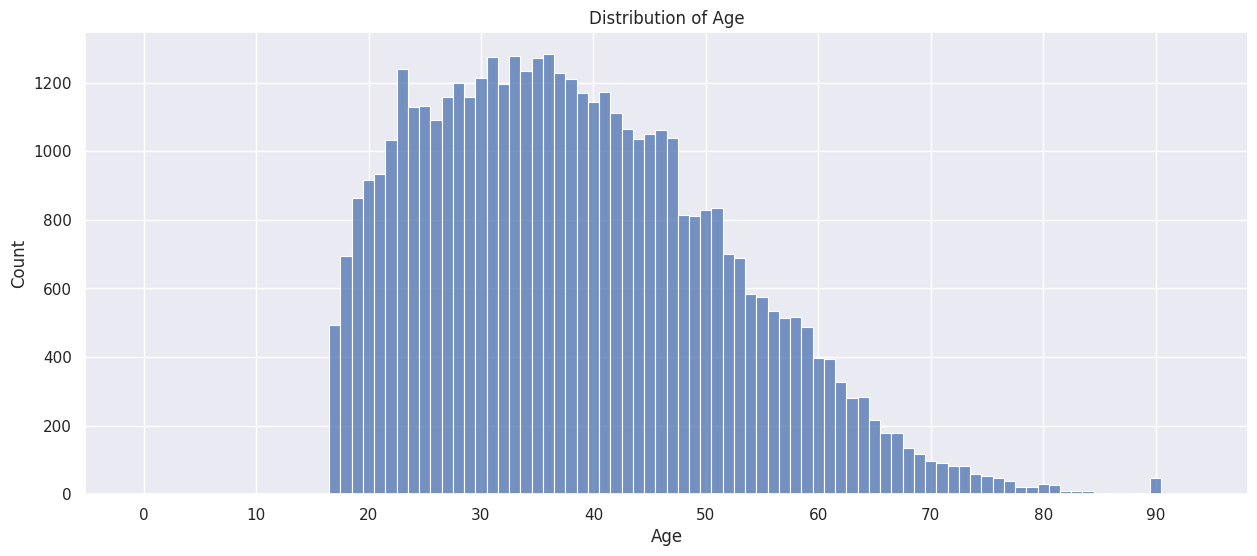

In [43]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(15, 6))
sns.histplot(data=df['age'], bins=np.arange(95)-0.5)

plt.xticks(range(0, 100, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Age vs. Income Level')

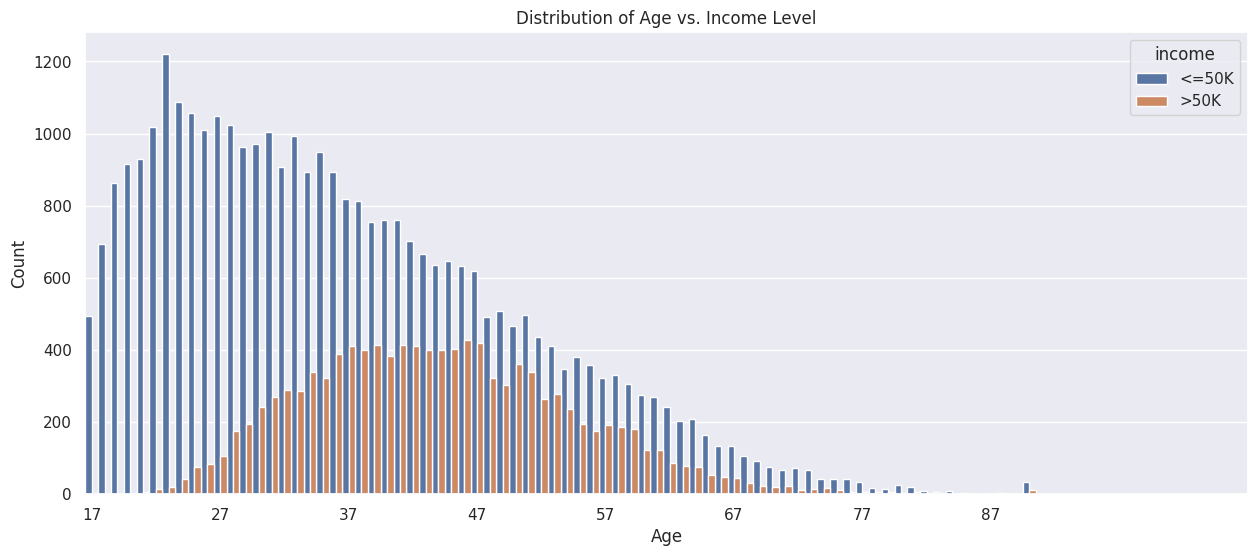

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='age', hue='income', width=1)

plt.xticks(range(0, 100, 10))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age vs. Income Level')

## Distribution of Workclass

Text(0.5, 1.0, 'Distribution of Work Class vs. Income')

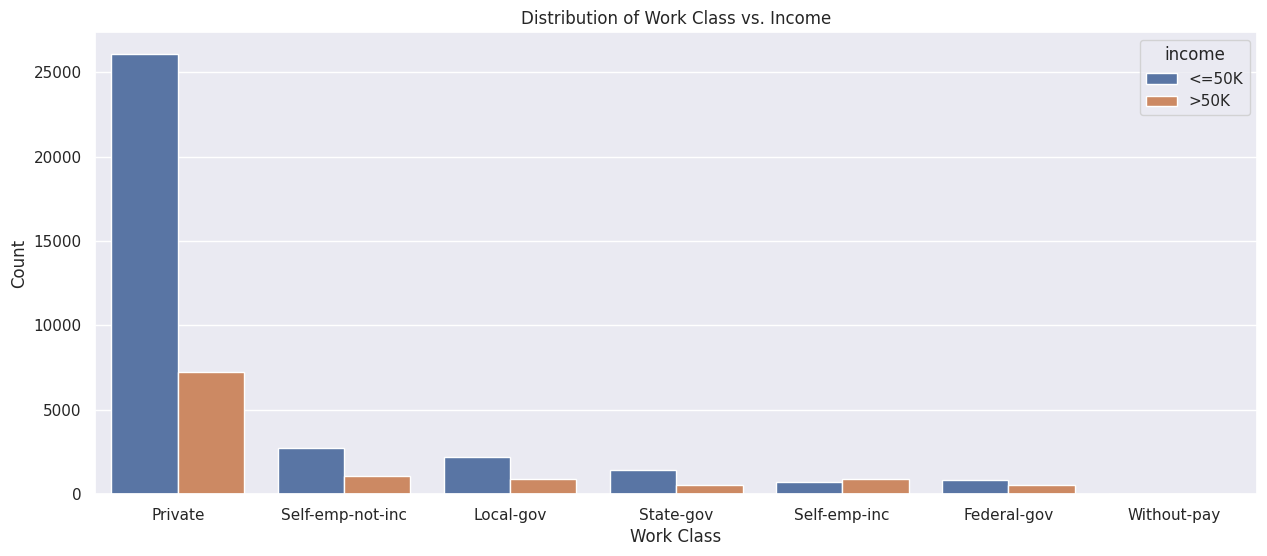

In [45]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='workclass', hue='income', order=df['workclass'].value_counts().index)

plt.xlabel('Work Class')
plt.ylabel('Count')
plt.title('Distribution of Work Class vs. Income')

## Distribution of Education

Text(0.5, 1.0, 'Distribution of Highest Education Level vs. Income')

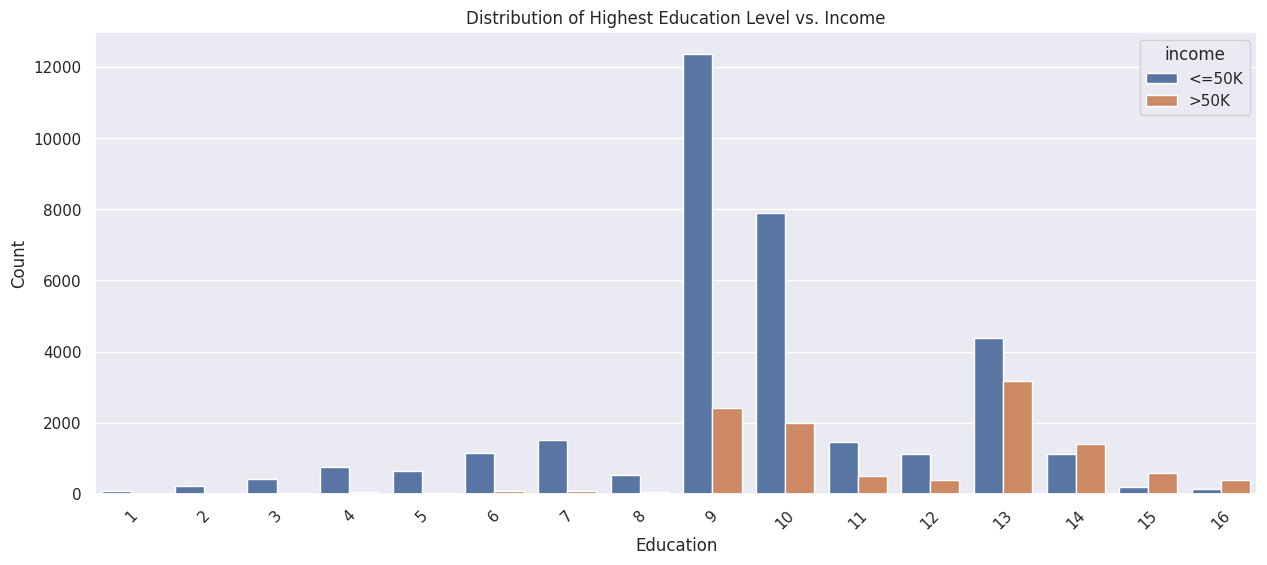

In [46]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='education', hue='income')


plt.xlabel('Education')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Highest Education Level vs. Income')

## Distribution of Marital Status

Text(0.5, 1.0, 'Distribution of Marital Status vs. Income')

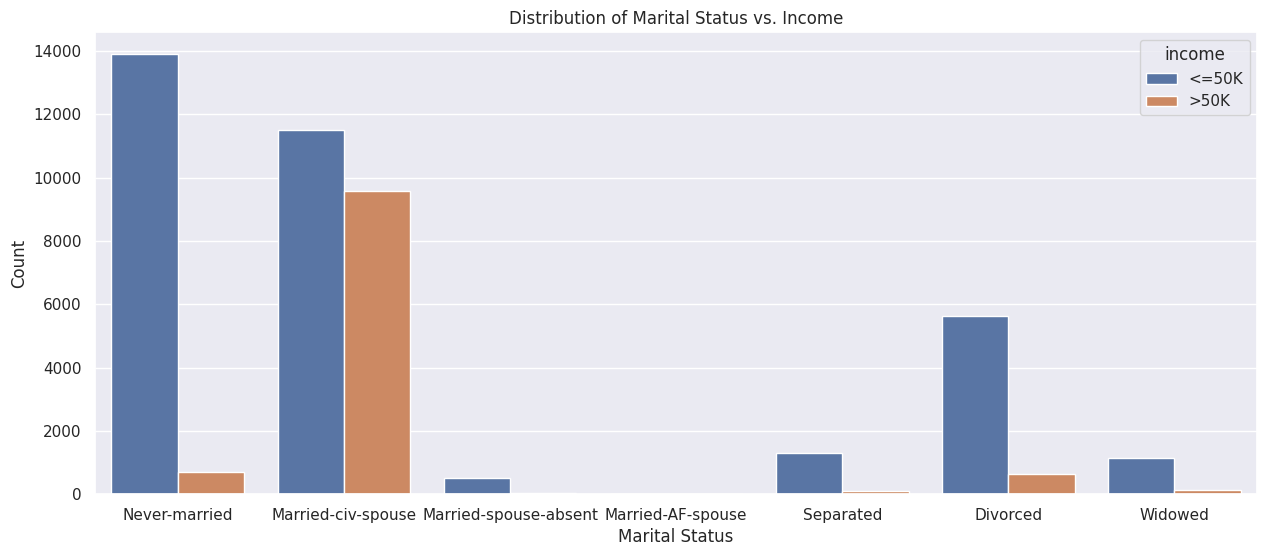

In [47]:
order = ['Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse', 'Separated', 'Divorced', 'Widowed']

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='marital-status', hue='income', order=order)


plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status vs. Income')

## Distribution of Occupation

Text(0.5, 1.0, 'Distribution of Occupation vs. Income')

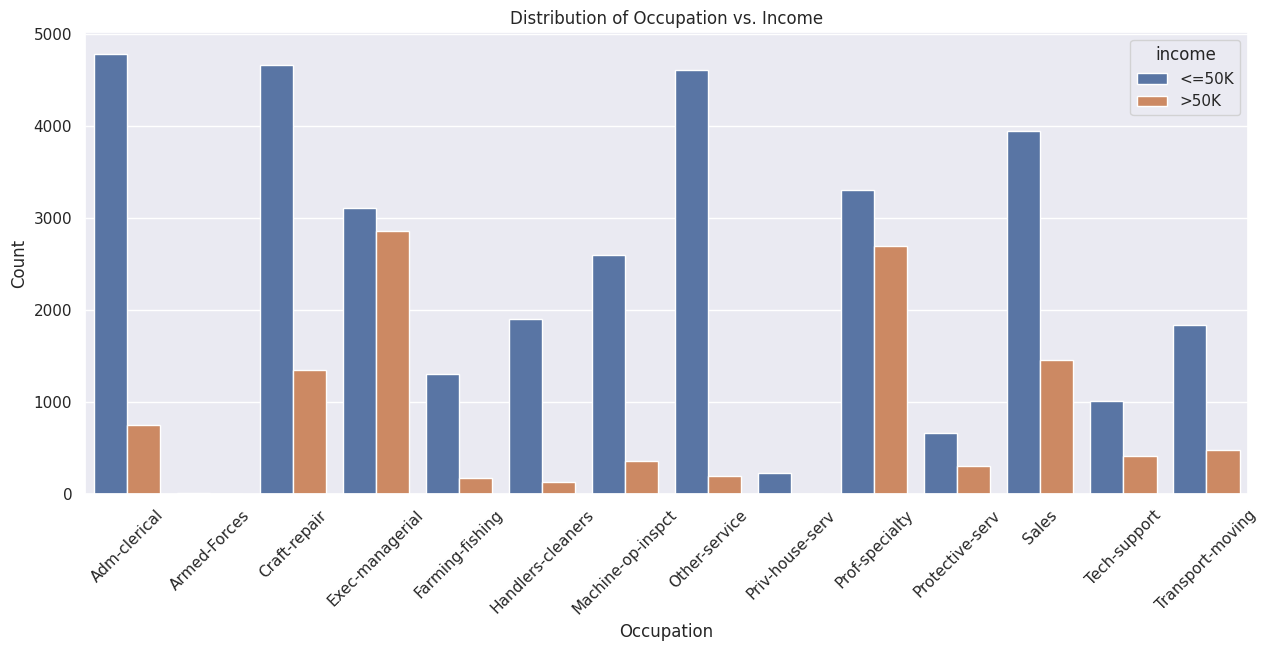

In [48]:
order = df['occupation'].unique()
order.sort()

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='occupation', hue='income', order=order)


plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Occupation vs. Income')

## Distribution of Relationship

Text(0.5, 1.0, 'Distribution of Relationship Status vs. Income')

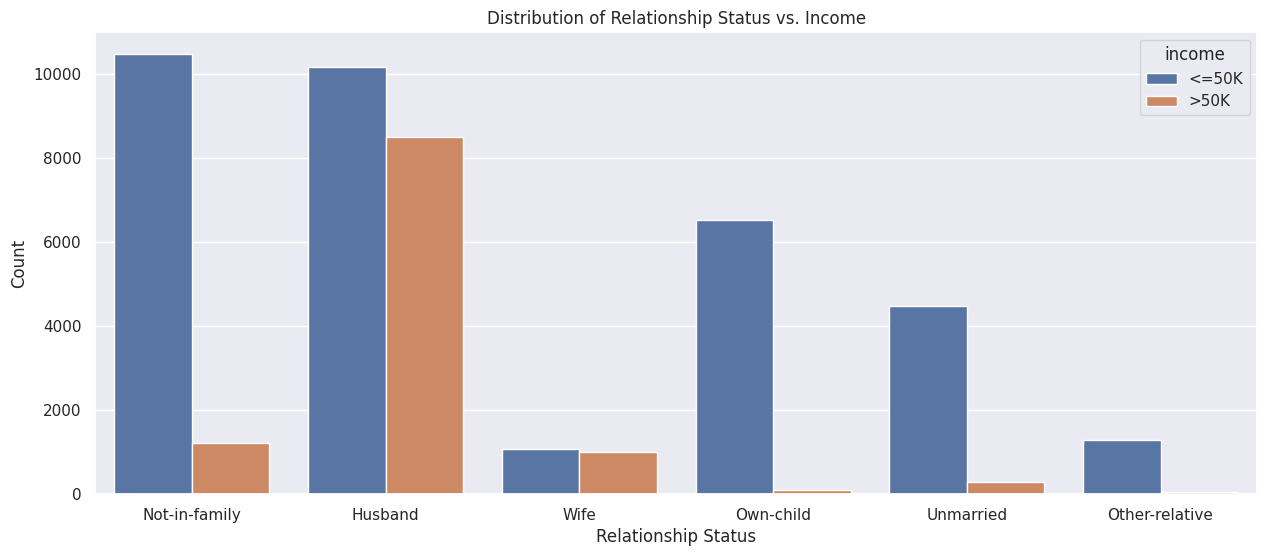

In [49]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='relationship', hue='income')


plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.title('Distribution of Relationship Status vs. Income')

## Distribution of Race

Text(0.5, 1.0, 'Distribution of Race vs. Income')

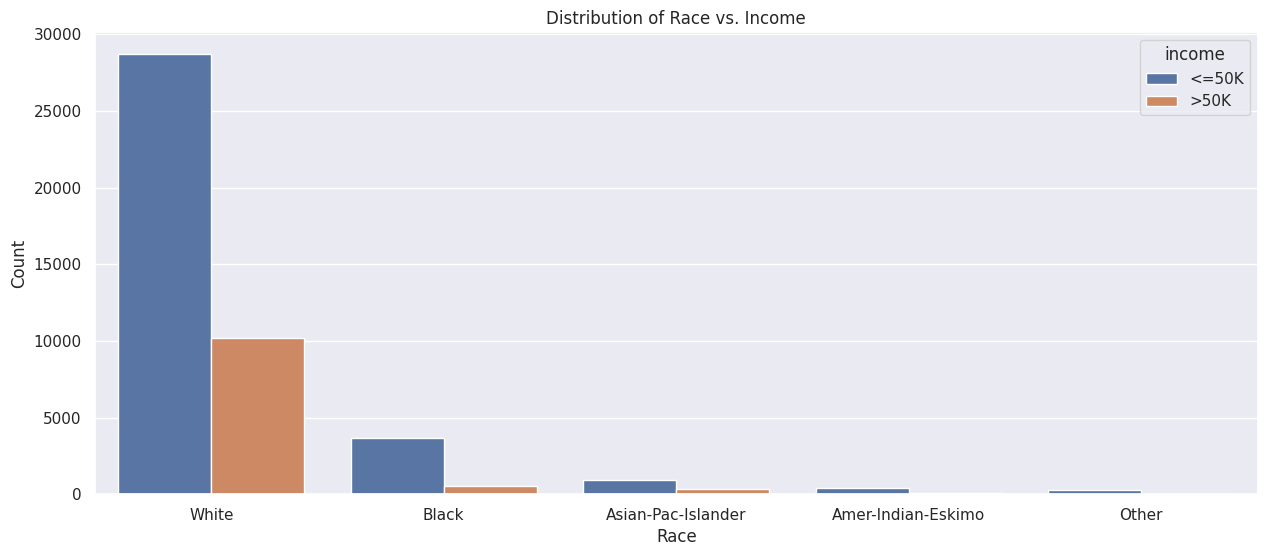

In [50]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='race', hue='income')


plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race vs. Income')

## Distribution of Sex

Text(0.5, 1.0, 'Distribution of Sex vs. Income')

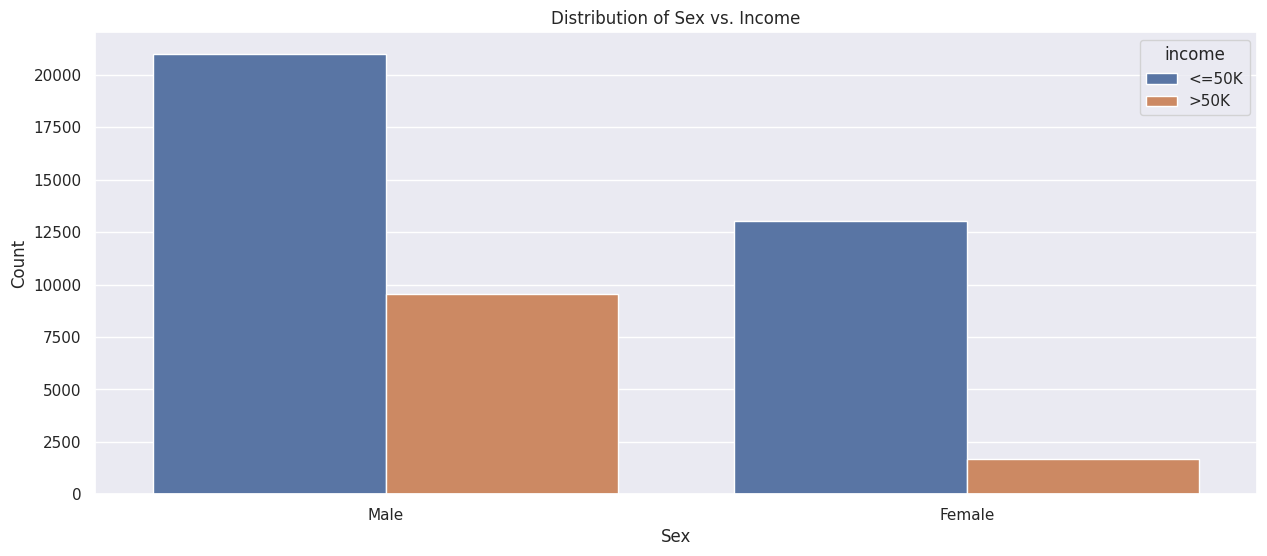

In [51]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='sex', hue='income')


plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex vs. Income')

## Distribution of Hours Per Week

Text(0.5, 1.0, 'Distribution of Hours Per Week vs. Income Level')

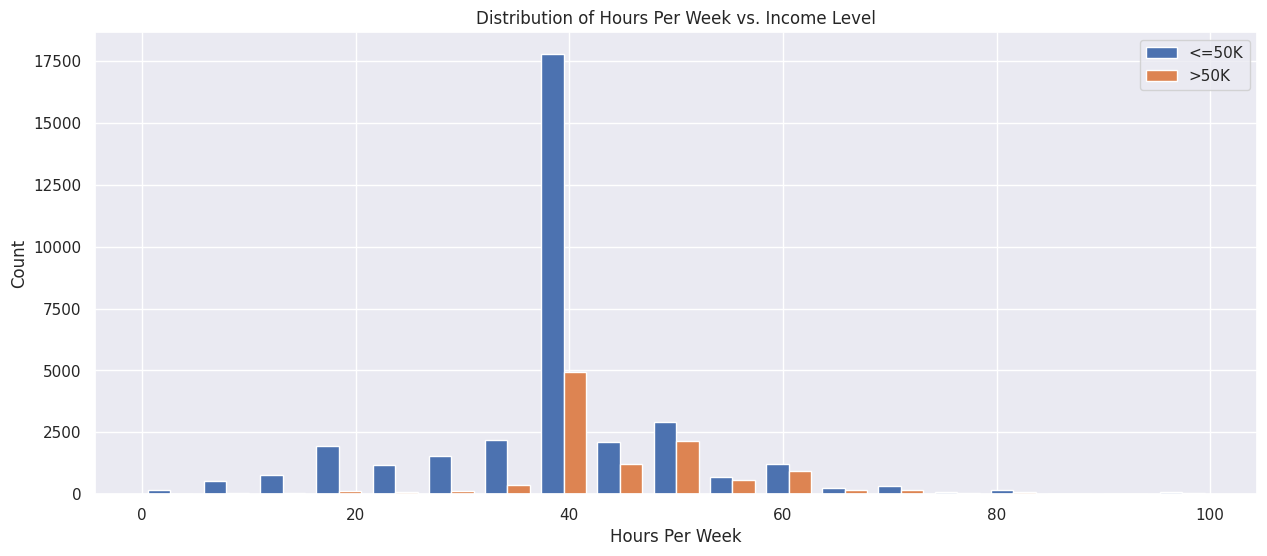

In [52]:
data = df[['hours-per-week', 'income']]
below_income = data[data['income'] == '<=50K']['hours-per-week']
above_income = data[data['income'] == '>50K']['hours-per-week']

plt.figure(figsize=(15, 6))
plt.hist(x=[below_income, above_income], bins=np.linspace(0, 100, 20), label=['<=50K', '>50K'])

plt.legend(loc='upper right')
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.title('Distribution of Hours Per Week vs. Income Level')

# Feature Engineering
For a classification model, feature engineering is important to transforming our variables into a format suitable for supervised learning.

In [53]:
# split into features and target
y = df.pop('income')
X = df

## Boolean Target Variable

For our classication model, our target variable must be a boolean variable. Currently, **`income`** is binary but not boolean; **`income`** contains the following values: **`<=50K`** and **`>50K`**.

We'll encode **`income`** with **`0`** for the majority class and **`1`** for the minority class.

In [54]:
# check class percentage
index = y.value_counts().index
count = y.value_counts()
for i in range(2):
  percentage = count[i] / len(df) * 100
  print("class='%s', count=%d, percentage=%.3f%%" % (index[i], count[i], percentage))
# encode 'income'
y = LabelEncoder().fit_transform(y)

class='<=50K', count=34014, percentage=75.216%
class='>50K', count=11208, percentage=24.784%


Our dataset has a class imbalance; the majority class **`<=50K`** is three times larger than the minority class **`>50K`**. Class imbalances cause our model to bias towards the majority class because there is not enough data to learn about minority class patterns.

We'll use class weighting to handle the class imbalance.

## Categorical Variables
For our classification model, our categorical variables must be encoded; the logistic regression algorithm won't work if our categorical variables are not encoded as numerical values.

We'll use dummy-encoding to encode our categorical variables.

In [55]:
X['sex'] = X['sex'].apply(lambda x: 0 if x=='Male' else 1)
# list of categorical variables
cat_features = X.select_dtypes(['object']).columns
# create dummy variables
dummies = pd.get_dummies(X[cat_features], drop_first=True, dtype=int)
# concatenate dummies to orginal dataframe
X = pd.concat([X, dummies], axis=1)
# drop original columns
X.drop(cat_features, axis=1, inplace=True)

# Train-Test Split
We'll divide our dataset into two subsets: **`train`** and **`test`**. Our **`train`** subset will be used to construct our model. Our **`test`** subset will be used to evaluate our model.

In [56]:
# split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)
# shape of train and test data
print("train size X : ", X_train.shape)
print("train size y : ", y_train.shape)
print("test size X : ", X_test.shape)
print("test size y : ", y_test.shape)

train size X :  (31655, 79)
train size y :  (31655,)
test size X :  (13567, 79)
test size y :  (13567,)


After splitting our dataset, we have **`31655`** observations in the **`train`** subset and **`13567`** observations in the **`test`** subset.

# Feature Scaling
For our classification model, our numerical variables should all be scaled to the same range. The algorithm used to construct our Logistric Regression assumes variables which vary greatly in magnitude are more relevant than variables with a smaller magnitude; thus, our model will be biased towards those variables.

In [57]:
# scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
We'll construct our initial logistic regression model using default paramenters and improve it with hyperparameter tuning.

As mentioned above, we'll using class-weighting to handle our class imbalance.

In [58]:
# build logistic regression with class-weighting and default parameters
lr1 = LogisticRegression(class_weight={0:0.25, 1:0.75})
# train model
lr1.fit(X_train, y_train)
# make predictions on test subset
y_pred = lr1.predict(X_test)
# predict probabilities on test subset and take probability for class 1([:1])
y_pred_prob = lr1.predict_proba(X_test)[:, 1]
# confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
# ROC-AUC score
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_prob))
# accuracy score
print("Accuracy socre:", accuracy_score(y_test, y_pred))
# precision score
print("Precision socre:", precision_score(y_test, y_pred))
# recall score
print("Recall score:", recall_score(y_test, y_pred))
# f1 score
print("F1 score:", f1_score(y_test, y_pred))

Confusion Matrix: 
 [[7992 2201]
 [ 546 2828]] 

ROC-AUC score: 0.8980223186280715
Accuracy socre: 0.797523402373406
Precision socre: 0.5623384370650228
Recall score: 0.8381742738589212
F1 score: 0.6730929429965488


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hyperparameter Tuning
While the model learns parameters from the data, we can dictate hyperparameters to shape the model's structure. We'll use **`GridSearch`** to find the most optimal hyperparameters.

In [59]:
# initialize instance of logistic regression
lr = LogisticRegression()
# set range for class-weighting
weights = np.linspace(0.0, 0.99, 10)
# specify hyperparameters
parameters = {'C':[0.1, 0.5, 1, 10, 15, 20], 'penalty':['l1', 'l2'], 'class_weight':[{0:x, 1:1.0-x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# GridSearch for hyperparameter tuning
model = GridSearchCV(estimator=lr, param_grid=parameters, scoring='f1', cv=folds, return_train_score=True)
# train model
model.fit(X_train, y_train)
# print best hyperparameters
print("F1 score:", model.best_score_)
print("Hyperparameters:", model.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1 score: 0.6824101229812907
Hyperparameters: {'C': 10, 'class_weight': {0: 0.33, 1: 0.6699999999999999}, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tuned Logistic Regression
Now we'll construct our model using the optimal parameters we found.

In [60]:
# construct logistic regression with optimal hyperparameters
lr2 = LogisticRegression(class_weight={0:0.33, 1:0.67}, penalty='none')
model = lr2.fit(X_train, y_train)
# predict probabilities on test subset and take probability for class 1([:1])
y_pred_prob = lr2.predict_proba(X_test)[:, 1]
# predict target on test subset
y_pred = lr2.predict(X_test)
# confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
# ROC-AUC score
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_prob))
# accuracy score
print("Accuracy socre:", accuracy_score(y_test, y_pred))
# precision score
print("Precision socre:", precision_score(y_test, y_pred))
# recall score
print("Recall score:", recall_score(y_test, y_pred))
# f1 score
print("F1 score:", f1_score(y_test, y_pred))
#0.6859215475550778
#0.6864908503767492

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix: 
 [[8686 1507]
 [ 823 2551]] 

ROC-AUC score: 0.9016052428788287
Accuracy socre: 0.8282597479177416
Precision socre: 0.6286347954657466
Recall score: 0.7560758743331357
F1 score: 0.6864908503767492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Coefficients
Now we'll take a look at our logistic model's coefficients. We'll being looking at the coefficients for our tuned model because it has a higher F1 score than our tuned model.

In [61]:
lm2 = sm.Logit(y_train, X_train).fit()
print(lm2.summary())

         Current function value: 0.338017
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31655
Model:                          Logit   Df Residuals:                    31576
Method:                           MLE   Df Model:                           78
Date:                Tue, 30 Apr 2024   Pseudo R-squ.:                  0.3959
Time:                        03:09:35   Log-Likelihood:                -10700.
converged:                      False   LL-Null:                       -17713.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8471      0.118     15.653      0.000       1.616       2.078
x2             4.2695      0.138     30.989      0.000       3.999       4.540
x3            -0.6776      0.076     -8.947      0.0

In [62]:
print(lr2.coef_, lr2.intercept_)

[[ 2.14629932e+00  4.39965031e+00 -6.77783333e-01  3.08578759e+00
   2.44146181e+01 -7.31232532e-01 -5.08664377e-01 -2.37476299e-01
  -9.84261997e-01 -8.74933479e-01 -1.44279345e+00  2.47964875e+00
   2.23469605e+00  2.68269459e-01 -4.04845433e-01  9.44153280e-03
   1.34611306e-02  6.43240027e-02  1.25069418e-01  8.00279794e-01
  -9.60486967e-01 -6.99743553e-01 -2.80220305e-01 -7.30791250e-01
  -2.53859824e+00  5.70116565e-01  5.02553133e-01  2.76132248e-01
   5.19827697e-01 -1.13362449e-02  4.33350327e-01 -3.84289981e-01
  -5.59283045e-01  1.97959742e-01  1.20155452e+00  1.19996454e+00
   5.92979660e-01  5.64976465e-01  7.72832158e-01  6.35273372e-01
  -7.62275989e-01 -1.54101119e+00  3.55249234e-02 -8.21997755e-01
  -4.63671098e-01 -8.08352628e-02  4.48166360e-01  8.55479131e-01
  -4.25782754e-02  1.28984373e-01 -5.89536271e-02  7.53305885e-01
  -1.08962223e-02 -4.90686826e-01 -9.14819289e-01  4.02949850e-01
  -1.36801702e-01  4.17531667e-01  9.55981024e-01  4.45146592e-01
  -5.29614

In [63]:
i = 0
for coef in lr2.coef_[0]:
  odds_ratio = np.exp(coef)
  print(f"Odds ratio for {X.columns[i]}: {odds_ratio:.4f}")
  i += 1

Odds ratio for age: 8.5531
Odds ratio for education: 81.4224
Odds ratio for sex: 0.5077
Odds ratio for hours-per-week: 21.8847
Odds ratio for capital-proft: 40099035615.2041
Odds ratio for workclass_Local-gov: 0.4813
Odds ratio for workclass_Private: 0.6013
Odds ratio for workclass_Self-emp-inc: 0.7886
Odds ratio for workclass_Self-emp-not-inc: 0.3737
Odds ratio for workclass_State-gov: 0.4169
Odds ratio for workclass_Without-pay: 0.2363
Odds ratio for marital-status_Married-AF-spouse: 11.9371
Odds ratio for marital-status_Married-civ-spouse: 9.3436
Odds ratio for marital-status_Married-spouse-absent: 1.3077
Odds ratio for marital-status_Never-married: 0.6671
Odds ratio for marital-status_Separated: 1.0095
Odds ratio for marital-status_Widowed: 1.0136
Odds ratio for occupation_Armed-Forces: 1.0664
Odds ratio for occupation_Craft-repair: 1.1332
Odds ratio for occupation_Exec-managerial: 2.2262
Odds ratio for occupation_Farming-fishing: 0.3827
Odds ratio for occupation_Handlers-cleaners:

# Decision Tree Model
Decision tree algorithms are commonly used for supervised, classificiation tasks. While logistic regression adheres to certain assumptions, we don't need to follow any assumptions for decision trees.

In [64]:
# build decision tree with basic parameters
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
# accuracy for train subset and test subset
print(clf1.score(X_train, y_train), clf1.score(X_test, y_test))
# confusion matrix
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
# ROC-AUC score
# accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# precision score
print("Precision socre:", precision_score(y_test, y_pred))
# recall score
print("Recall score:", recall_score(y_test, y_pred))
# f1 score
print("F1 score:", f1_score(y_test, y_pred))

0.9743168535776339 0.8158030515220757

Confusion Matrix: 
 [[8972 1221]
 [1278 2096]] 

Accuracy Score: 0.8158030515220757
Precision socre: 0.6318962918299669
Recall score: 0.6212211025489034
F1 score: 0.626513226722463


## Hyperparameter Tuning
We'll now search for the most optimal hyperparameters for our decision tree using **`GridSearch`**.

In [65]:
# instantiate instance of decision tree
clf = DecisionTreeClassifier()
# specifiy hyperparameters
param_grid = {'criterion': ['entropy','gini'],
              'max_depth': list(range(1, 10)),
              'min_samples_split': list(range(2, 10)),
              'min_samples_leaf': list(range(1, 10))}
# GridSearch for hyperparameter tuning
model = GridSearchCV(clf, param_grid, cv=5)
model.fit(X_train, y_train)
# print best hyperparameters
print("Hyperparameters:", model.best_params_)
print("Score:", model.best_score_)
print("Accuracy:", model.best_estimator_.score(X_test, y_test))

Hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 8}
Score: 0.85288264097299
Accuracy: 0.8581853025724183


## Tuned Decision Tree
Now we'll construct our model using the optimal parameters we found.

In [66]:
# construct decision tree with optimal hyperparameters
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=6)
# train decision tree
clf2 = clf2.fit(X_train,y_train)
# predict target on test subset
y_pred = clf2.predict(X_test)
# confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
# ROC-AUC score
print("ROC-AUC score:", roc_auc_score(y_test, y_pred_prob))
# accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# precision score
print("Precision socre:", precision_score(y_test, y_pred))
# recall score
print("Recall score:", recall_score(y_test, y_pred))
# f1 score
print("F1 score:", f1_score(y_test, y_pred))

Confusion Matrix: 
 [[9641  552]
 [1378 1996]] 

ROC-AUC score: 0.9016052428788287
Accuracy Score: 0.8577430529962409
Precision socre: 0.783359497645212
Recall score: 0.5915826911677534
F1 score: 0.6740965889902061
